In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
#train_data.info()
#test_data.info()

In [3]:
train_data_1 = train_data.copy()
categorical_cols = ['class_of_worker','education','marital_stat', 'country_of_birth_self','citizenship','race','sex',
                    'enroll_in_edu_inst_last_wk','major_industry_code','major_occupation_code','hispanic_origin',
                    'member_of_a_labor_union','reason_for_unemployment','full_or_part_time_employment_stat',
                    'tax_filer_stat','region_of_previous_residence','state_of_previous_residence','detailed_household_and_family_stat',
                    'detailed_household_summary_in_household','migration_code-change_in_msa','migration_code-change_in_reg','migration_code-move_within_reg',
                    'live_in_this_house_1_year_ago','migration_prev_res_in_sunbelt','family_members_under_18','country_of_birth_father','country_of_birth_mother',
                    'country_of_birth_self','citizenship','fill_inc_questionnaire_for_veteran\'s_admin']
encoder = LabelEncoder()
for categorical_col in categorical_cols:
    train_data_1[categorical_col] = encoder.fit_transform(train_data_1[categorical_col])


In [18]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101143 entries, 0 to 101142
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype
---  ------                                      --------------   -----
 0   age                                         101143 non-null  int64
 1   class_of_worker                             101143 non-null  int32
 2   detailed_industry_recode                    101143 non-null  int64
 3   detailed_occupation_recode                  101143 non-null  int64
 4   education                                   101143 non-null  int32
 5   wage_per_hour                               101143 non-null  int64
 6   enroll_in_edu_inst_last_wk                  101143 non-null  int32
 7   marital_stat                                101143 non-null  int64
 8   major_industry_code                         101143 non-null  int32
 9   major_occupation_code                       101143 non-null  int32
 10  race                

In [4]:
X = train_data_1.iloc[:, :-1]  # All columns except the last one
y = train_data_1.iloc[:, -1]  # Only the last column

In [5]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
xgb_classifier = xgb.XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xg=xgb_classifier.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred_xg))
print(classification_report(y_val, y_pred_xg))

Accuracy: 0.9353722440101506
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     27038
           1       0.76      0.60      0.67      3305

    accuracy                           0.94     30343
   macro avg       0.85      0.79      0.82     30343
weighted avg       0.93      0.94      0.93     30343



In [7]:
rf = RandomForestClassifier()
rf.fit(X, y)

RandomForestClassifier()

In [8]:
y_pred = rf.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

Accuracy: 0.9993408693932703
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     27038
           1       1.00      0.99      1.00      3305

    accuracy                           1.00     30343
   macro avg       1.00      1.00      1.00     30343
weighted avg       1.00      1.00      1.00     30343



In [54]:
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 4]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_

y_pred = best_rf.predict(X_val)

print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))


Fitting 3 folds for each of 36 candidates, totalling 108 fits
Accuracy: 0.933295982598952
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     27038
           1       0.78      0.54      0.64      3305

    accuracy                           0.93     30343
   macro avg       0.86      0.76      0.80     30343
weighted avg       0.93      0.93      0.93     30343



In [6]:
test_data_1 = test_data.copy()
categorical_cols = ['class_of_worker','education','marital_stat', 'country_of_birth_self','citizenship','race','sex',
                    'enroll_in_edu_inst_last_wk','marital_stat','major_industry_code','major_occupation_code','hispanic_origin',
                    'member_of_a_labor_union','reason_for_unemployment','full_or_part_time_employment_stat',
                    'tax_filer_stat','region_of_previous_residence','state_of_previous_residence','detailed_household_and_family_stat',
                    'detailed_household_summary_in_household','migration_code-change_in_msa','migration_code-change_in_reg','migration_code-move_within_reg',
                    'live_in_this_house_1_year_ago','migration_prev_res_in_sunbelt','family_members_under_18','country_of_birth_father','country_of_birth_mother',
                    'country_of_birth_self','citizenship','fill_inc_questionnaire_for_veteran\'s_admin']
encoder = LabelEncoder()
for categorical_col in categorical_cols:
    test_data_1[categorical_col] = encoder.fit_transform(test_data_1[categorical_col])
scaler = StandardScaler()

test_data_1 = scaler.fit_transform(test_data_1)


In [22]:
y_pred_xg=xgb_classifier.predict(test_data_1)

In [11]:
y_pred_rf=rf.predict(test_data_1)

In [23]:
import pandas as pd

# Convert predictions to a dataframe
predictions_df = pd.DataFrame(y_pred_xg, columns=["Label"])

# Export to CSV
predictions_df.to_csv('prediction-xgb.csv', index=False)


In [ ]:
predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11239 entries, 0 to 11238
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Label   11239 non-null  int32
dtypes: int32(1)
memory usage: 44.0 KB


In [17]:
from sklearn.tree import DecisionTreeClassifier

param_grid_tree = {'max_depth': [None, 10, 20, 30, 40, 50],
                   'min_samples_split': [2, 5, 10],
                   'min_samples_leaf': [1, 2, 4]}
tree = DecisionTreeClassifier(random_state=42)
grid_tree = GridSearchCV(tree, param_grid_tree, cv=5)
grid_tree.fit(X_train, y_train)

print("Best parameters:", grid_tree.best_params_)

y_pred_tree = grid_tree.predict(X_val)
print("Decision Tree Accuracy:", accuracy_score(y_val, y_pred_tree))


Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Decision Tree Accuracy: 0.9226839798306035


In [14]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_val)

print("Naive Bayes Accuracy:", accuracy_score(y_val, y_pred_nb))

Naive Bayes Accuracy: 0.7342385393665755


In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)

# Evaluation
y_pred_knn = knn.predict(X_val)
print("k-NN Accuracy:", accuracy_score(y_val, y_pred_knn))

k-NN Accuracy: 0.9076228454668293


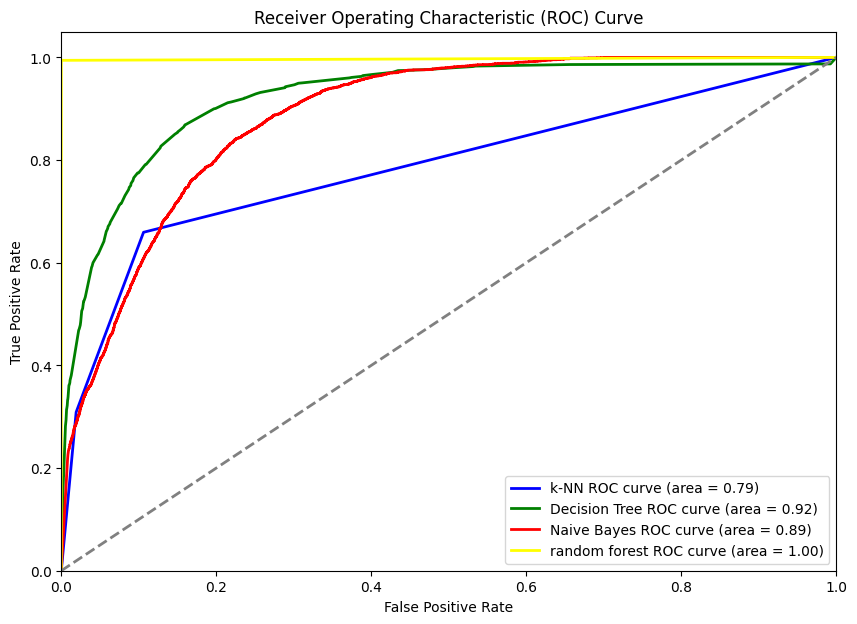

In [19]:

# For k-NN
y_prob_knn = knn.predict_proba(X_val)[:, 1]
fpr_knn, tpr_knn, _ = roc_curve(y_val, y_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# For Decision Tree
y_prob_tree = grid_tree.predict_proba(X_val)[:, 1]
fpr_tree, tpr_tree, _ = roc_curve(y_val, y_prob_tree)
roc_auc_tree = auc(fpr_tree, tpr_tree)

# For Naive Bayes
y_prob_nb = nb.predict_proba(X_val)[:, 1]
fpr_nb, tpr_nb, _ = roc_curve(y_val, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

# for random forest
y_prob_rf = rf.predict(X_val)
fpr_rf, tpr_rf, _ = roc_curve(y_val, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot
plt.figure(figsize=(10,7))
plt.plot(fpr_knn, tpr_knn, color='blue', lw=2, label='k-NN ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot(fpr_tree, tpr_tree, color='green', lw=2, label='Decision Tree ROC curve (area = %0.2f)' % roc_auc_tree)
plt.plot(fpr_nb, tpr_nb, color='red', lw=2, label='Naive Bayes ROC curve (area = %0.2f)' % roc_auc_nb)
plt.plot(fpr_rf, tpr_rf, color='yellow', lw=2, label='random forest ROC curve (area = %0.2f)' % roc_auc_rf)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
#export csv files
predicted = grid_tree.predict(test_data_1)
predictions_df1 = pd.DataFrame({
    'ID': range(0, len(predicted)), 
    'Predicted_Label': predicted
})
predictions_df1.to_csv('prediction-tree.csv', index=False)

In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

model_deep = models.Sequential()
model_deep.add(layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model_deep.add(layers.Dropout(0.5))  # Dropout for regularization
model_deep.add(layers.Dense(64, activation='relu'))
model_deep.add(layers.Dropout(0.5))
model_deep.add(layers.Dense(32, activation='relu'))
model_deep.add(layers.Dense(1, activation='sigmoid'))

model_deep.compile(optimizer='adam',
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

history_deep = model_deep.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the deeper model
val_loss_deep, val_acc_deep = model_deep.evaluate(X_val, y_val)
print(f'Validation Accuracy: {val_acc_deep * 100:.2f}%')


Epoch 1/50
2213/2213 [==============================] - 12s 5ms/step - loss: 0.2300 - accuracy: 0.9059 - val_loss: 0.1895 - val_accuracy: 0.9206
Epoch 2/50
2213/2213 [==============================] - 10s 4ms/step - loss: 0.2045 - accuracy: 0.9155 - val_loss: 0.1910 - val_accuracy: 0.9224
Epoch 3/50
2213/2213 [==============================] - 10s 5ms/step - loss: 0.1990 - accuracy: 0.9177 - val_loss: 0.1928 - val_accuracy: 0.9236
Epoch 4/50
2213/2213 [==============================] - 10s 4ms/step - loss: 0.1964 - accuracy: 0.9181 - val_loss: 0.1891 - val_accuracy: 0.9242
Epoch 5/50
2213/2213 [==============================] - 12s 5ms/step - loss: 0.1948 - accuracy: 0.9194 - val_loss: 0.1839 - val_accuracy: 0.9245
Epoch 6/50
2213/2213 [==============================] - 11s 5ms/step - loss: 0.1926 - accuracy: 0.9196 - val_loss: 0.1927 - val_accuracy: 0.9251
Epoch 7/50
2213/2213 [==============================] - 10s 5ms/step - loss: 0.1923 - accuracy: 0.9203 - val_loss: 0.1917 - val_ac

In [30]:

# Make predictions
predicted = model_deep.predict(test_data_1)

# Apply threshold and flatten array
predicted_classes = (predicted >= 0.5).astype(int).flatten()

# Create DataFrame
predictions_sq = pd.DataFrame({
    'ID': range(0, len(predicted_classes)), 
    'Predicted_Label': predicted_classes
})

# Save to CSV
predictions_sq.to_csv('prediction-seq.csv', index=False)

352/352 [==============================] - 1s 3ms/step


In [28]:
import numpy as np
y_pred = model_deep.predict(X_val)
y_pred_classes = np.where(y_pred >= 0.5, 1, 0)

949/949 [==============================] - 2s 2ms/step


In [29]:
print("Accuracy:", accuracy_score(y_val, y_pred_classes))

Accuracy: 0.9268694591833372


In [33]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier

[LightGBM] [Info] Number of positive: 7839, number of negative: 62961
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1359
[LightGBM] [Info] Number of data points in the train set: 70800, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.110720 -> initscore=-2.083404
[LightGBM] [Info] Start training from score -2.083404


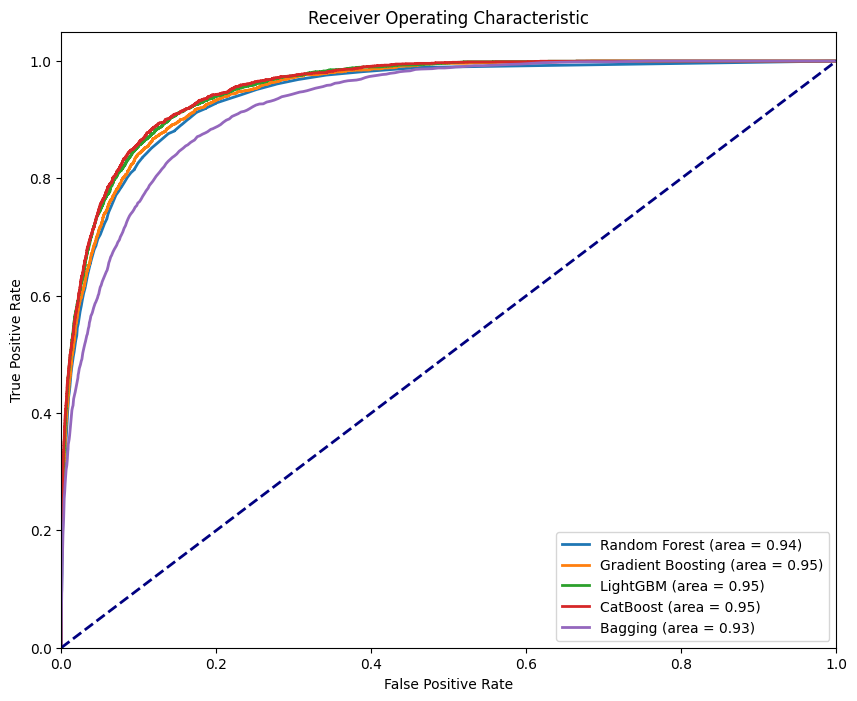

In [34]:
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "LightGBM": lgb.LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0),
    "Bagging": BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1)
}

# Train classifiers and plot ROC curves
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_scores = clf.predict_proba(X_val)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [35]:
for name, clf in classifiers.items():
    predicted = clf.predict(test_data_1)
    predictions_df1 = pd.DataFrame({
        'ID': range(0, len(predicted)), 
        'Predicted_Label': predicted
    })
    file_name = f'prediction-{name}.csv'
    predictions_df1.to_csv(file_name, index=False)

Predictions for Extra Trees saved to predictions-Extra_Trees.csv
Predictions for AdaBoost saved to predictions-AdaBoost.csv
Predictions for Stacking saved to predictions-Stacking.csv


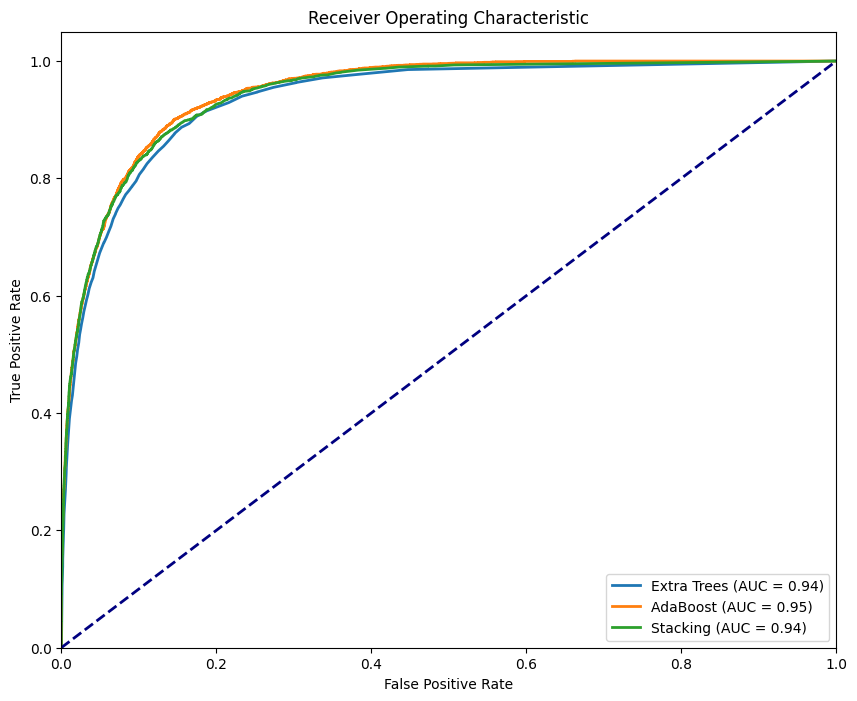

In [15]:
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier, StackingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Initialize classifiers
classifiers = {
    "Extra Trees": ExtraTreesClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Stacking": StackingClassifier(estimators=[
        ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
        ('extra_trees', ExtraTreesClassifier(n_estimators=100, random_state=42)),
    ], final_estimator=LogisticRegression(), n_jobs=-1)
}

# Train classifiers, plot ROC curves, and save predictions
plt.figure(figsize=(10, 8))
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_scores = clf.predict_proba(X_val)[:, 1]
    
    # Save predictions to CSV
    predicted = clf.predict(test_data_1)
    predictions_df = pd.DataFrame({
        'ID': range(0, len(predicted)), 
        'Predicted_Label': predicted.round()
    })
    predictions_df.to_csv(f'prediction-{name.replace(" ", "_")}.csv', index=False)
    print(f'Predictions for {name} saved to predictions-{name.replace(" ", "_")}.csv')
    
    # Calculate ROC curve and AUC
    fpr, tpr, thresholds = roc_curve(y_val, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.2f})')

# Add a random guess line and labels, and show the plot
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [25]:
# Load CSV files into dataframes
#df1 = pd.read_csv('prediction-CatBoost.csv')
df2 = pd.read_csv('prediction-AdaBoost.csv')
df1 = pd.read_csv('prediction-tree.csv')

# Ensure the two dataframes have the same columns in the same order
df2 = df2[df1.columns]

# Check for row-wise equality and compute percentage difference
equal_rows = df1.eq(df2).all(axis=1)
percentage_difference = (1 - equal_rows.mean()) * 100

print(f'Percentage Difference: {percentage_difference:.2f}%')


Percentage Difference: 7.00%


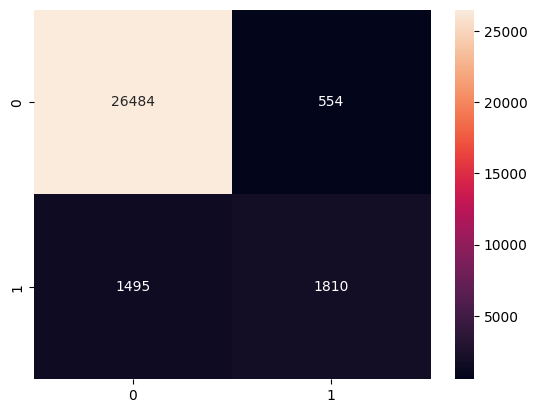

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer, roc_auc_score, confusion_matrix, f1_score
import matplotlib.pyplot as plt
import seaborn as sns



param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

ada_clf = AdaBoostClassifier(random_state=42)
grid_search_ada = GridSearchCV(ada_clf, param_grid, scoring='roc_auc', cv=5)
grid_search_ada.fit(X_train, y_train)

# 使用最佳参数在测试集上进行评估
best_ada_clf = grid_search_ada.best_estimator_
y_pred = best_ada_clf.predict(X_val)

# 计算评价指标
roc_auc = roc_auc_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# 显示混淆矩阵
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.show()
